In [1]:
!pip install mpl-toolkits.clifford
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [2]:
data = pd.read_csv("kc_house_dataa.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,3810000860,20150506T000000,240000.0,4,1.50,1920,7973,1.0,0,0,3,8,1920,0,1955,0,98178,47.4961,-122.235,2020,8840
1806,8079100370,20141107T000000,574000.0,3,2.00,2060,7000,1.0,0,0,4,9,2060,0,1988,0,98029,47.5644,-122.012,2110,7000
1807,2025770560,20141103T000000,930000.0,4,4.25,5710,24663,2.0,0,0,3,11,5710,0,2007,0,98092,47.3065,-122.158,4060,23847
1808,225069017,20140714T000000,850000.0,4,3.00,2720,183823,2.0,0,0,3,8,2720,0,1975,2007,98053,47.6749,-122.002,2140,173804


In [3]:
data.describe()  # show the statistical values

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.810000e+03,1.810000e+03,1810.000000,1810.000000,1810.000000,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,4.604639e+09,5.306008e+05,3.380663,2.070856,2072.820442,1.564702e+04,1.443646,0.011050,0.245856,3.463536,7.618232,1771.343646,301.476796,1968.638674,89.232044,98076.356906,47.555213,-122.210183,1992.979006,13746.703315
std,2.856808e+09,3.812037e+05,0.890563,0.756573,916.581671,4.821098e+04,0.512827,0.104564,0.778226,0.681466,1.178675,828.089540,450.025963,28.098025,412.390938,53.249652,0.140198,0.137844,683.136678,27185.324262
min,1.150089e+07,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.512000,740.000000,660.000000
25%,2.110825e+09,3.150000e+05,3.000000,1.500000,1420.000000,5.466000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98032.250000,47.455775,-122.323000,1490.000000,5411.500000
50%,3.996900e+09,4.427500e+05,3.000000,2.000000,1910.000000,7.990000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1972.000000,0.000000,98059.000000,47.566450,-122.219000,1860.000000,7938.500000
75%,7.310325e+09,6.326938e+05,4.000000,2.500000,2500.000000,1.142050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,600.000000,1991.000000,0.000000,98117.000000,47.677475,-122.123000,2367.500000,10372.750000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2390.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.708000,5790.000000,425581.000000


<function seaborn.utils.despine>

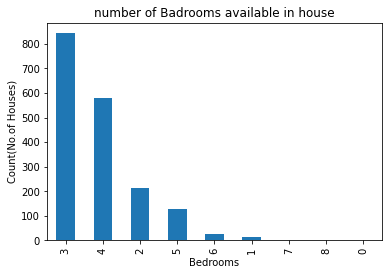

In [4]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Badrooms available in house')
plt.xlabel('Bedrooms')
plt.ylabel('Count(No.of Houses)')
sns.despine

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

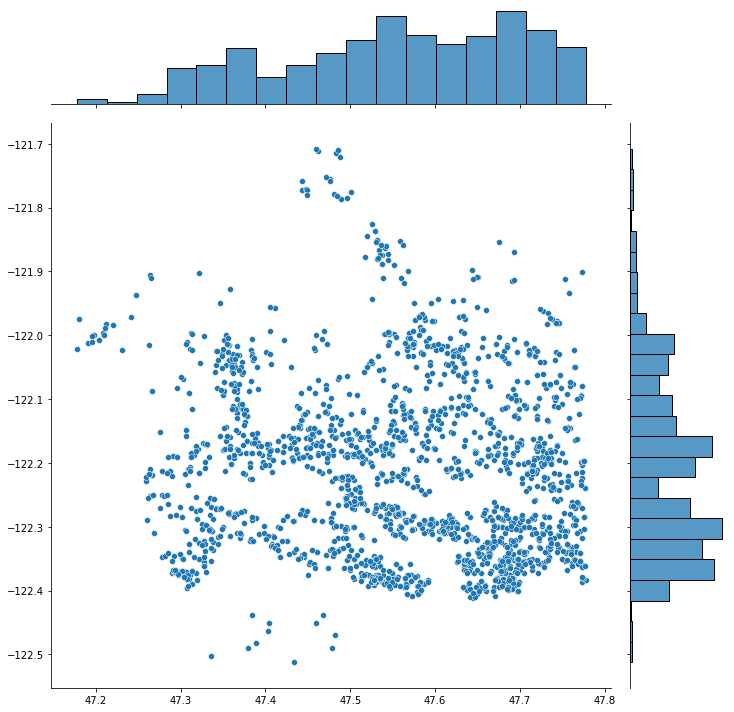

<function seaborn.utils.despine>

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values,y=data.long.values,size=10)
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.show()
#plt1=plt()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

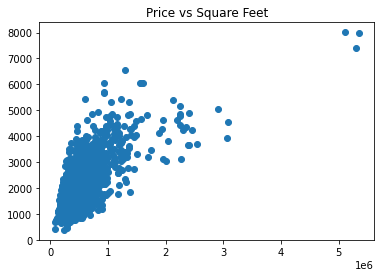

In [6]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

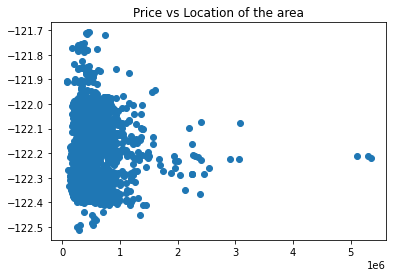

In [7]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

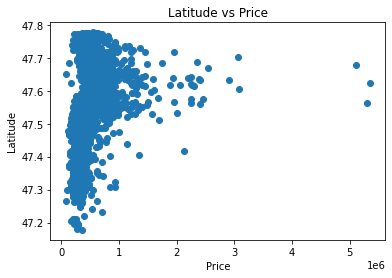

In [8]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.title("Latitude vs Price")

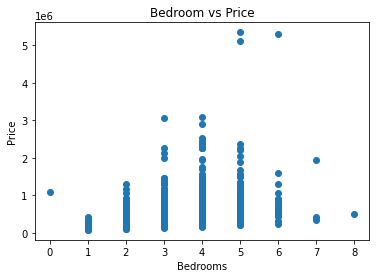

<function seaborn.utils.despine>

In [16]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

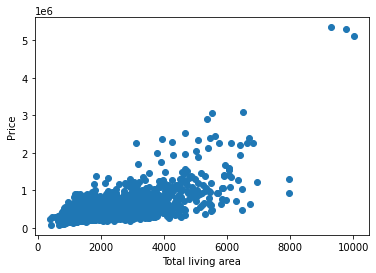

In [19]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])
plt.xlabel("Total living area")
plt.ylabel("Price")
plt.show()

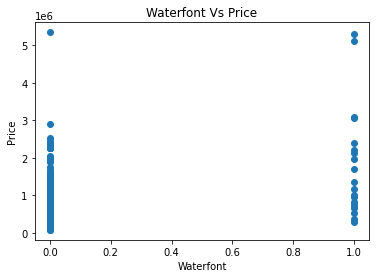

In [20]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfont Vs Price")
plt.xlabel("Waterfont")
plt.ylabel("Price")
plt.show()

In [22]:
train1=data.drop(['id','price'],axis=1)
train1

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,20150506T000000,4,1.50,1920,7973,1.0,0,0,3,8,1920,0,1955,0,98178,47.4961,-122.235,2020,8840
1806,20141107T000000,3,2.00,2060,7000,1.0,0,0,4,9,2060,0,1988,0,98029,47.5644,-122.012,2110,7000
1807,20141103T000000,4,4.25,5710,24663,2.0,0,0,3,11,5710,0,2007,0,98092,47.3065,-122.158,4060,23847
1808,20140714T000000,4,3.00,2720,183823,2.0,0,0,3,8,2720,0,1975,2007,98053,47.6749,-122.002,2140,173804


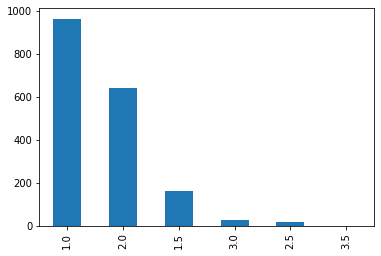

In [23]:
data.floors.value_counts().plot(kind='bar')

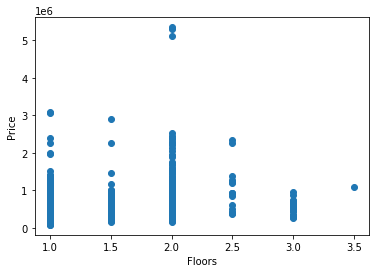

In [24]:
plt.scatter(data.floors,data.price)
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Price')

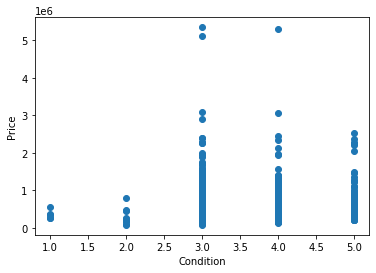

In [25]:
plt.scatter(data.condition,data.price)
plt.xlabel("Condition")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

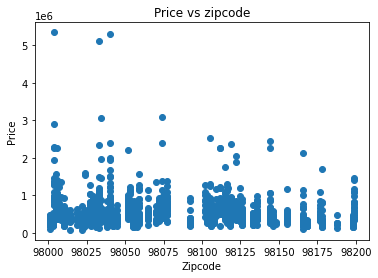

In [26]:
plt.scatter(data.zipcode,data.price)
plt.title("Price vs zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")

In [27]:
from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()

In [69]:
labels=data['price']
conv_dates=[1 if values==2014 else 0 for values in data.date]
data['date']=conv_dates
train1=data.drop(['id','price'],axis=1)

In [70]:
import warnings
from sklearn.model_selection import train_test_split

In [71]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =1000)

In [72]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.score(x_test,y_test)

0.7128209150310372

In [74]:
len(x_train)

1629

In [51]:
len(x_test)

181

In [53]:
len(y_train)

1629

In [54]:
len(y_test)

181

In [79]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
clf.score(x_test,y_test)

0.7914364039190533

In [84]:
#y_pred = reg.predict(x_test)